# Page Rank and HITS

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

This lab will be playing with the algorithms Page Rank and HITS.

## Task 1

First, we shall look at our good friends from this karate club. Let us pick several values for coefficient $\alpha$ and see what we get.

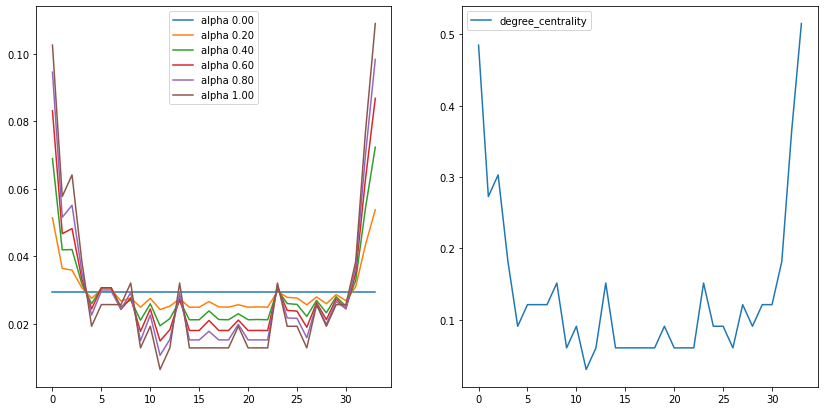

In [2]:
G = nx.karate_club_graph()

fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = pr.values()
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
ax.legend()

ay = plt.subplot(122) # Plotting Degree centrality
dc = list(nx.degree_centrality(G).values())
ay.plot(dc, label="degree_centrality")
ay.legend()
plt.show()

a) How can you normalize degree centrality so that it sums up to 1? Do it and plot all these on the same plot.

_We can devide each element by sum of elements, so each one will represent some percentage of sum and in sum they will give us 1._

In [3]:
normalized_dc = np.array(dc) / (np.array(dc).sum())

In [4]:
normalized_dc.sum()

1.0

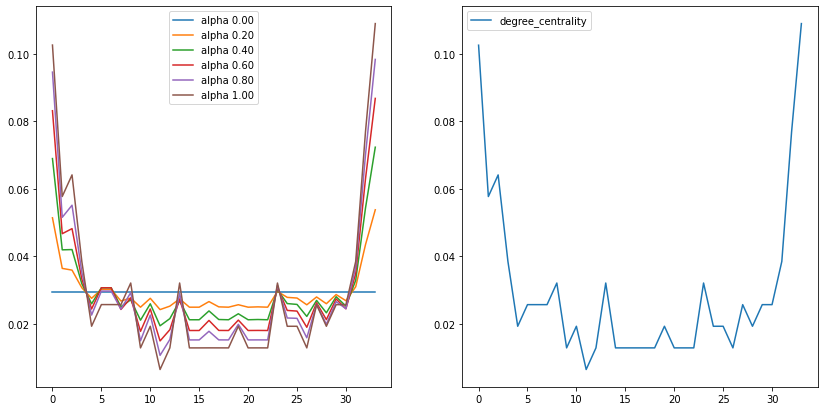

In [5]:
fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = pr.values()
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
ax.legend()

ay = plt.subplot(122) # Plotting Degree centrality
ay.plot(normalized_dc, label="degree_centrality")
ay.legend()
plt.show()

_And this is where you explain what you see and why._

_We see same graphs, but on different scales, since we used formula for scaling. It doesn't change the shape as it changes each value equally_

b) In order to see how fast it converges, we shall need to code our own Page Rank algorithm. Code a function ```mypagerank(G,alpha,k)``` which executes the power iteration $k$ times starting from the uniform distribution among nodes in the graph. It should return the list of page rank scores. Recall that
$$ \mathbf{p}^{t+1} = \alpha (D^{-1}A)^{\top}\mathbf{p} + (1-\alpha)\frac{\mathbf{e}}{n}, $$
where $A$ is the adjacency matrix of $G$ and $D$ is the diagonal matrix made of degrees of vertices.

In [6]:
nx.linalg.graphmatrix.adjacency_matrix(G)

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [7]:
## Reminder: A @ B computes the multiplication of matrices A and B.

def mypagerank(G, alpha, k):
    # adjacency matrix of 𝐺
    A = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()
    
    # initialize p and e vector
    n = A.shape[0]
    p = np.random.rand(n, 1)
    p = p / np.linalg.norm(p, 1)
    M = (alpha * A + (1 - alpha) / n)
    
    for i in range(k):
        p = M @ p
    return p

Alright, let us see how it goes...

c) Plot the results after 0 up to 10 iterations.

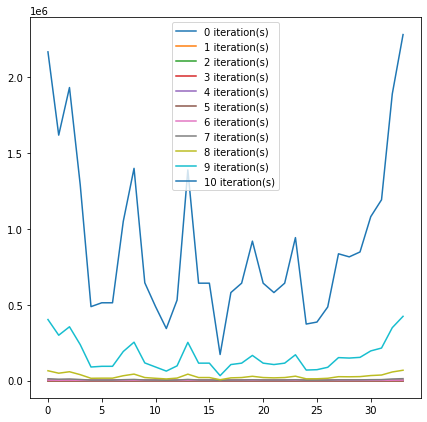

In [8]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)    

its = np.arange(0, 11, 1)

for it in its:
    pr = mypagerank(G, 0.85, it)
    prval = list(pr)
    ax.plot(prval, label='{:d} iteration(s)'.format(it))
    
ax.legend()
plt.show()

d) Pay attention to the order of colors. What do you observe? How can you explain it?

We see that if we have more iterations, then some pr values become bigger, some of them become even smaller. Bassicaly, we have more precise results after more iterations.

e) Plot Page Rank vs Degree Centrality for $\alpha$ in $\{0,0.5,1\}$.

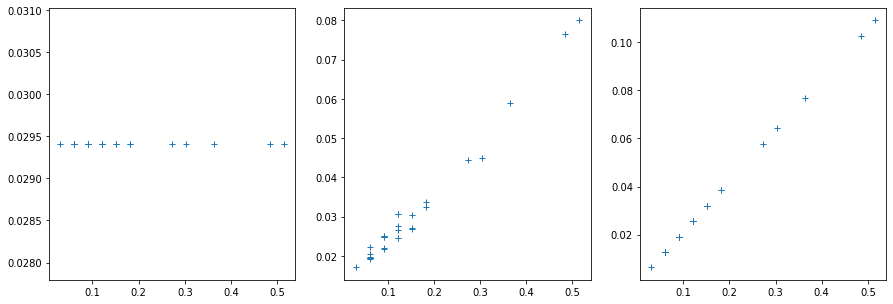

In [9]:
fig = plt.figure(1, figsize=(15,5))

d = nx.degree_centrality(G)
d = d.values()

ax = plt.subplot(131)    
pr = nx.pagerank(G, alpha=0)
pr = pr.values()
ax.plot(d, pr, '+')

ay = plt.subplot(132)    
pr = nx.pagerank(G, alpha=0.5)
pr = pr.values()
ay.plot(d, pr, '+')

az = plt.subplot(133)    
pr = nx.pagerank(G, alpha=1)
pr = pr.values()
az.plot(d, pr, '+')
plt.show()

_Here we can see some positive almost linear correlation, the more pr value some vertice has, the more degree centrality it obtains. It's evident since from definitions both values show some popularity or number of connections for each vertice._ 

## Task 2 

Experiment several teleportation vectors on the coappearance network of characters in the novel _Les Misérables_ (V. Hugo). The graph is in the file `lesmis.gml`. It was compiled by Donald Knuth [1]. Try to focus on several famous characters (Valjean, Javert, Gavroche, Cosette), or use betweenness centrality (is degree centrality of interest here?) for the teleportation. Each time, draw the network induced by nodes with high page rank. What can you observe?


[1] D. E. Knuth, _The Stanford GraphBase: A Platform for Combinatorial Computing_, Addison-Wesley, Reading, MA (1993).

_We need to compute betweenness centrality, since it shows us shortest paths and graph represents coappearance network here. We do not really need degree centrality here, as person might have many links to him, but still be a not important character. However, if person has many short paths, then it appears many times in the novel and probably represents important character._

_Here we firstly compute teleportation vector and then we use it to compute page rank for all persons._

In [10]:
G = nx.read_gml('lesmis.gml')

In [18]:
teleportation = nx.betweenness_centrality(G)

In [20]:
pr_values = nx.algorithms.link_analysis.pagerank_alg.pagerank(G, personalization=teleportation)

_Now let's choose popular characters:_

In [44]:
nodes = []
for k, v in pr_values.items():
    if v > 0.02:
        nodes.append(k)
print(nodes)

['Myriel', 'Valjean', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Gavroche', 'Marius', 'Enjolras', 'Bossuet']


_Create first subgraph_

In [47]:
G_sub = nx.Graph.subgraph(G, nodes=nodes)

In [63]:
labels = {}
for node in G_sub.nodes():
    labels[node] = node

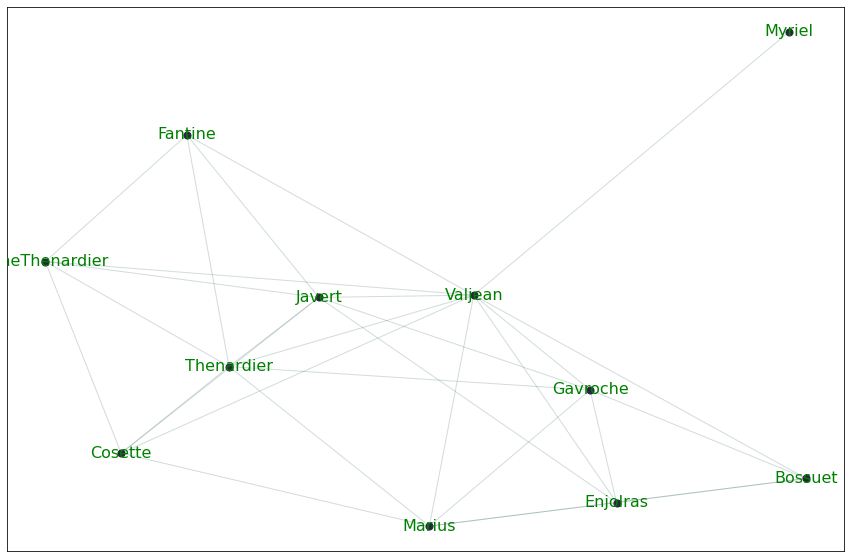

In [88]:
plt.figure(figsize=(15, 10))

pos = nx.spring_layout(G_sub)
nx.draw_networkx_edges(G_sub, pos, alpha=0.2, edge_color='#1B5350')
nx.draw_networkx_nodes(G_sub, pos=pos, node_color='#25283D', node_size=50)
nx.draw_networkx_labels(G_sub, pos=pos, labels=labels, font_size=16, font_color='green')
plt.show()

_Let's draw one more example with bigger cutoff for pr_

In [91]:
nodes = []
for k, v in pr_values.items():
    if v > 0.03:
        nodes.append(k)
print(nodes)

['Myriel', 'Valjean', 'Fantine', 'Thenardier', 'Javert', 'Gavroche', 'Marius']


In [92]:
G_sub = nx.Graph.subgraph(G, nodes=nodes)

In [93]:
labels = {}
for node in G_sub.nodes():
    labels[node] = node

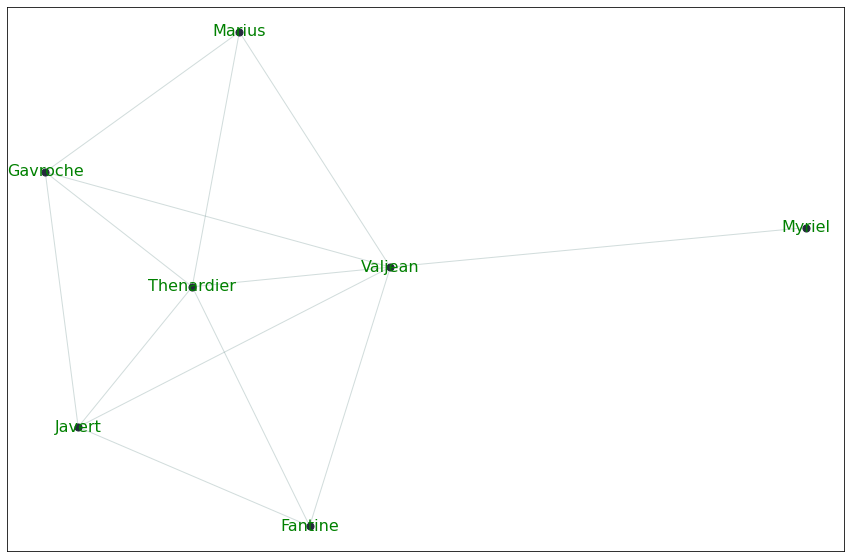

In [94]:
plt.figure(figsize=(15, 10))

pos = nx.spring_layout(G_sub)
nx.draw_networkx_edges(G_sub, pos, alpha=0.2, edge_color='#1B5350')
nx.draw_networkx_nodes(G_sub, pos=pos, node_color='#25283D', node_size=50)
nx.draw_networkx_labels(G_sub, pos=pos, labels=labels, font_size=16, font_color='green')
plt.show()

## Task 3

Let us now focus on larger networks. First let us read the network of political blogs.

In [165]:
#Some arcs are multi and it prevents some algorithms to work. We thus simplify it.

G = nx.read_gml('polblogs.gml')
A = nx.adjacency_matrix(G)
M = A.astype(bool).astype(int) #converts non-zero entries to True and then True to 1.
H = nx.DiGraph(M)
L = list(G)
mapping={}
for i in range(len(L)):
    mapping[i]=L[i]
Gsimp=nx.relabel_nodes(H,mapping) #relabel vertices with original names.

Run the HITS algorithm on `Gsimp` and plot the hubs score against the authorities score.

In [166]:
(h, a) = nx.hits(Gsimp)

Text(0, 0.5, 'Auth')

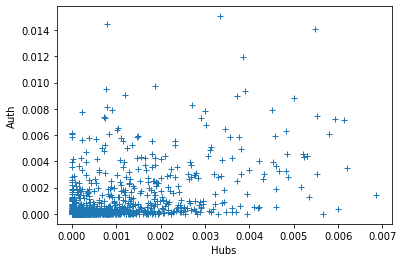

In [167]:
la = list(a.values())
lh = list(h.values())
plt.plot(lh,la, '+')
plt.xlabel('Hubs')
plt.ylabel('Auth')

Choose top authorities and hubs

In [201]:
new_a = {}

for k,v in a.items():
    if v >= 0.006:
        new_a[k] = v

In [202]:
new_h = {}

for k,v in h.items():
    if v >= 0.005:
        new_h[k] = v

Vizualize top Authorities colored in blue with sizes proportional to A-value and their common Hubs coloured in green with size proportional to H-value.

Get their nodes, values for **sizes** and common edges:

In [353]:
labels = {}
sizes = []
for node in Gsimp.nodes():
    if node in new_a:
        #set the node name as the key and the label as its value 
        labels[node] = node
        sizes.append(new_a[node])

In [354]:
hubs_labels = {}
hubs_sizes = []
for node in Gsimp.nodes():
    if node in new_h:
        #set the node name as the key and the label as its value 
        hubs_labels[node] = node
        hubs_sizes.append(new_h[node])

In [355]:
sizes = list(np.array(sizes) * 40000)
hubs_sizes = list(np.array(hubs_sizes) * 40000)

In [356]:
my_edges = nx.algorithms.boundary.edge_boundary(Gsimp, hubs_labels, labels)

In [357]:
edges_list = []
for i in my_edges:
    edges_list.append(i)

Firstly plotting the whole graph:

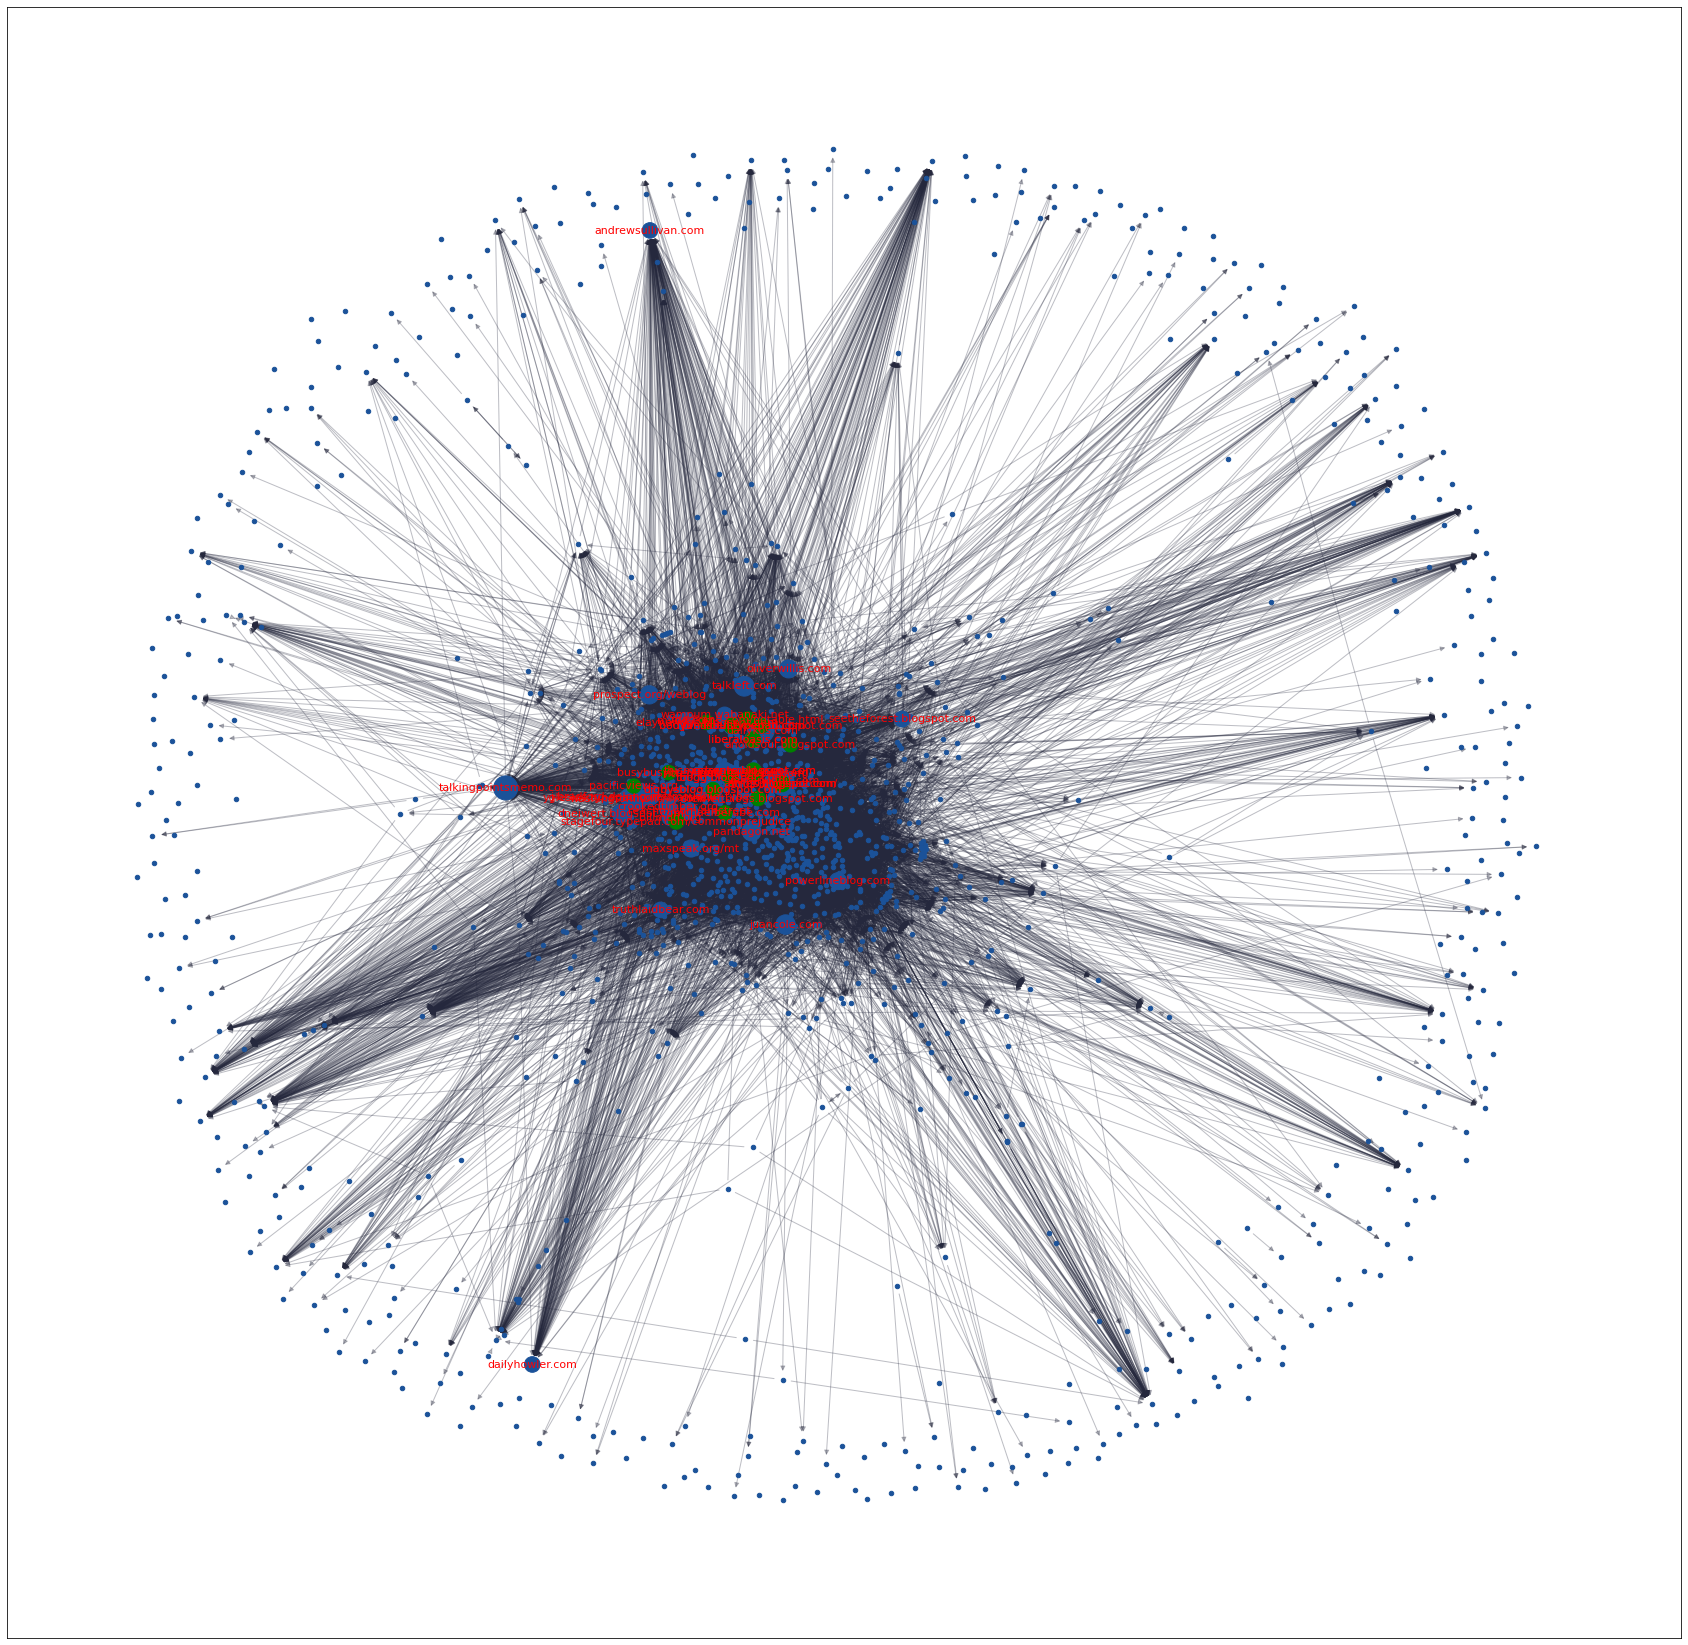

In [367]:
plt.figure(figsize=(30, 30))

pos = nx.spring_layout(Gsimp)
nx.draw_networkx_edges(Gsimp, pos, alpha=0.3, edge_color='#25283D')
nx.draw_networkx_nodes(Gsimp, pos=pos, node_color='#1B5299', node_size=20)
nx.draw_networkx_nodes(Gsimp, nodelist=labels, pos=pos, node_color='#1B5299', node_size=sizes)
nx.draw_networkx_labels(Gsimp, pos, labels, font_size=11, font_color='red')
nx.draw_networkx_nodes(Gsimp, nodelist=hubs_labels, pos=pos, node_color='green', node_size=hubs_sizes)
nx.draw_networkx_labels(Gsimp, pos, hubs_labels, font_size=11, font_color='red')
plt.show()

Let's plot whole graph with only nodes between hubs and authorities, since plotting nodes take too much time:

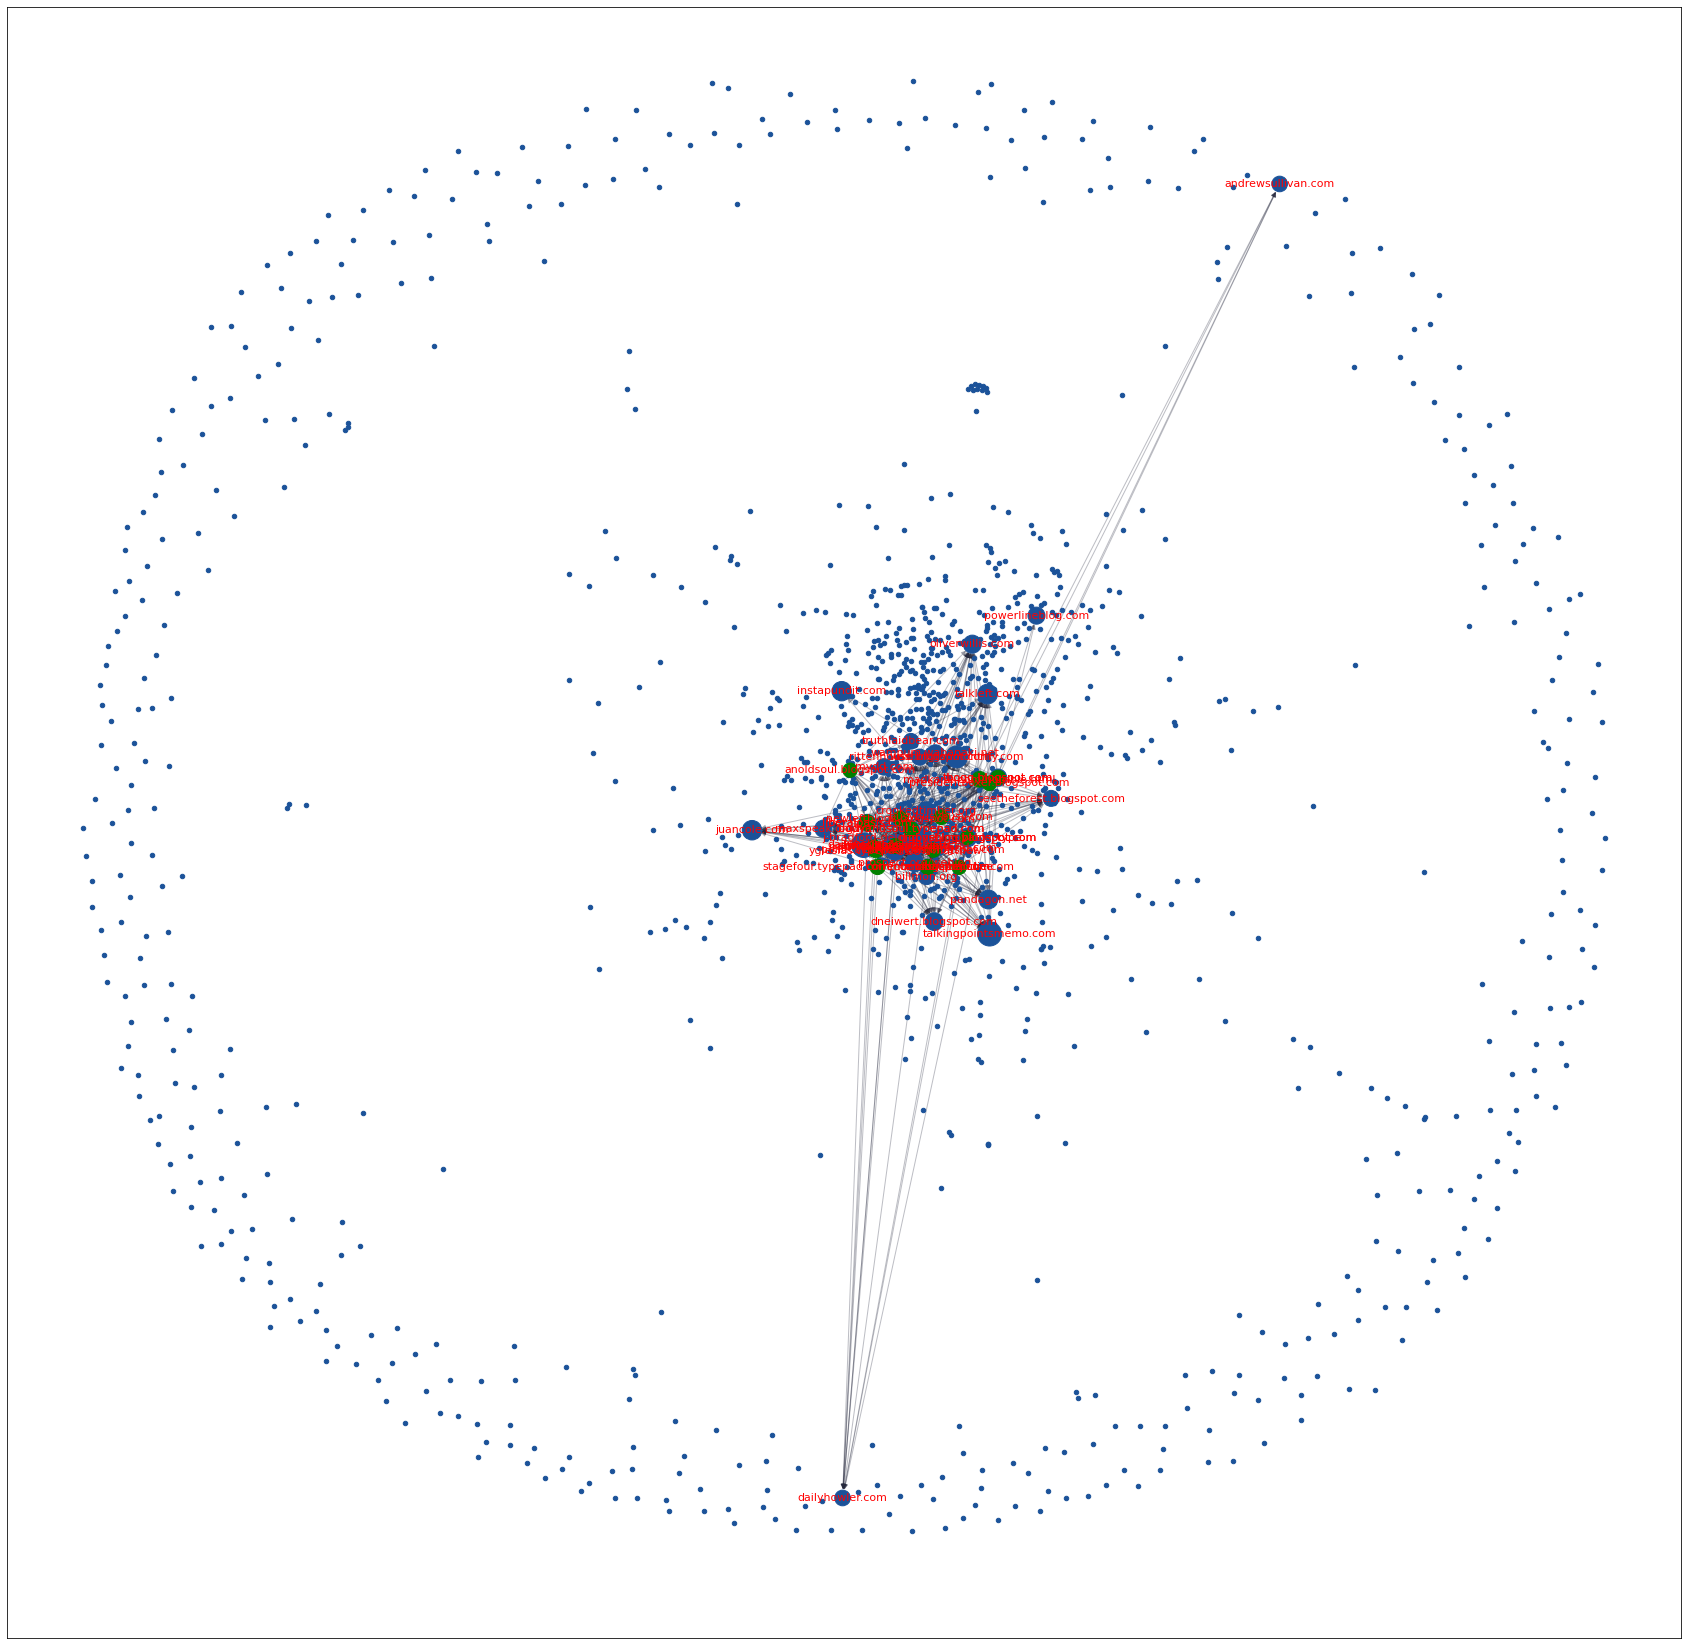

In [365]:
plt.figure(figsize=(30, 30))

pos = nx.spring_layout(Gsimp)
nx.draw_networkx_edges(Gsimp, pos, edgelist=edges_list, alpha=0.3, edge_color='#25283D')
nx.draw_networkx_nodes(Gsimp, pos=pos, node_color='#1B5299', node_size=20)
nx.draw_networkx_nodes(Gsimp, nodelist=labels, pos=pos, node_color='#1B5299', node_size=sizes)
nx.draw_networkx_labels(Gsimp, pos, labels, font_size=11, font_color='red')
nx.draw_networkx_nodes(Gsimp, nodelist=hubs_labels, pos=pos, node_color='green', node_size=hubs_sizes)
nx.draw_networkx_labels(Gsimp, pos, hubs_labels, font_size=11, font_color='red')
plt.show()

Now plotting only necessary part:

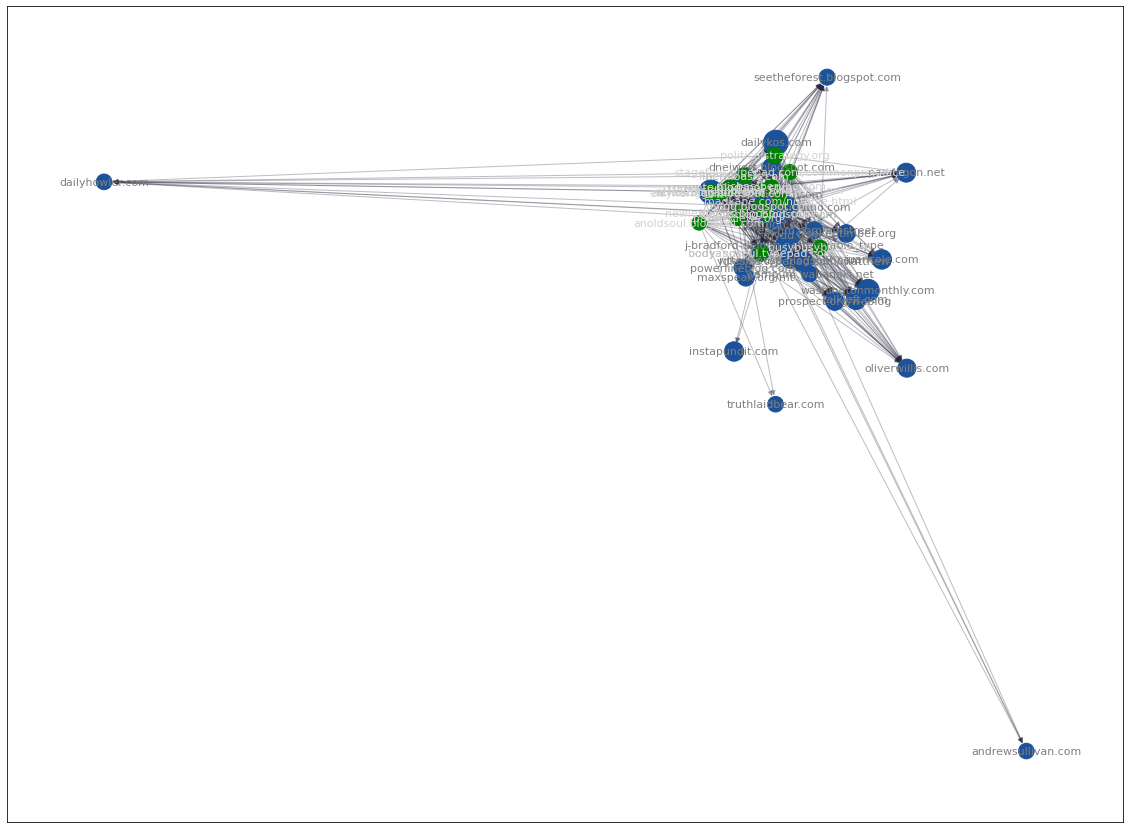

In [366]:
plt.figure(figsize=(20, 15))
    
pos = nx.spring_layout(Gsimp)

nx.draw_networkx_edges(Gsimp, pos, edgelist=edges_list, alpha=0.3, edge_color='#25283D')
nx.draw_networkx_nodes(Gsimp, nodelist=labels, pos=pos, node_color='#1B5299', node_size=sizes)
nx.draw_networkx_labels(Gsimp, pos, labels, font_size=11, font_color='grey')
nx.draw_networkx_nodes(Gsimp, nodelist=hubs_labels, pos=pos, node_color='green', node_size=hubs_sizes)
nx.draw_networkx_labels(Gsimp, pos, hubs_labels, font_size=11, font_color='lightgrey')
plt.show()